<a href="https://colab.research.google.com/github/vicmcl/aeronet/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
! git clone https://github.com/vicmcl/aeronet.git

Cloning into 'aeronet'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 36 (delta 16), reused 16 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 14.03 KiB | 2.80 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
!pip install pyvista

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 9.9 MB/s eta 0:00:00


In [4]:
# Mount Drive
from pathlib import Path
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive')
DRIVE_PATH = Path("/content/drive/MyDrive/")
ML_PATH = DRIVE_PATH / "Projects" / "aeronet"

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [5]:
!if [ ! -d /content/aeronet/cfd_data ]; then mkdir -p /content/aeronet/cfd_data; cp -r /content/drive/MyDrive/Projects/aeronet/* /content/aeronet/cfd_data/; fi
!ls /content/aeronet/cfd_data/

airFoil2D_SST_47.017_-4.369_4.85_6.296_6.401


In [6]:
from aeronet.load_cfd_data import CFDDataLoader, sample_data

In [7]:
case_name = "airFoil2D_SST_47.017_-4.369_4.85_6.296_6.401"
case_dir = ML_PATH / case_name
vtu_file = f"{case_dir}/{case_name}" + "_internal.vtu"
vtp_file = f"{case_dir}/{case_name}" + "_aerofoil.vtp"

In [27]:
loader = CFDDataLoader(vtu_file, vtp_file, drop=["U_2", "implicit_distance", "vtkOriginalPointIds"])
data_tensor, feature_names = loader.load_data()

Loading feature: nut
Loading feature: p
Loading feature: U
Skipping feature: U_2
Skipping feature: implicit_distance
Skipping feature: vtkOriginalPointIds
Removed duplicates: 858


Features: ['nut', 'p', 'U_0', 'U_1', 'is_surface']
Data shape: torch.Size([158870, 7])


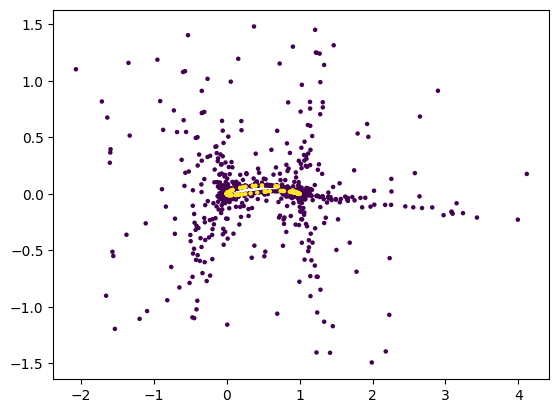

In [28]:
# Visualize sampled data
import matplotlib.pyplot as plt

sampled_data = sample_data(data_tensor, num_fluid=1000, num_surface=100)
print("Features:", feature_names)
print("Data shape:", data_tensor.shape)

plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=sampled_data[:, -1], s=5)
plt.show()